<a href="https://colab.research.google.com/github/santra-subhojit/Ybi_MLprojects/blob/main/Cancer_PredictionIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title of Project: Breast Cancer Prediction Using Logistic Regression



# Objective
# Predict whether a tumor is malignant or benign using features from the cell nucleus.



# Data Source
# Dataset URL: 'https://github.com/YBIFoundation/Dataset/raw/main/Cancer.csv'

# Step 1: Import Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Import Data

In [2]:
cancer = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Cancer.csv')

# Step 3: Describe Data

In [3]:
print(cancer.head())
print(cancer.info())
print(cancer.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

# Step 4: Data Visualization
# Visualize the distribution of the diagnosis classes

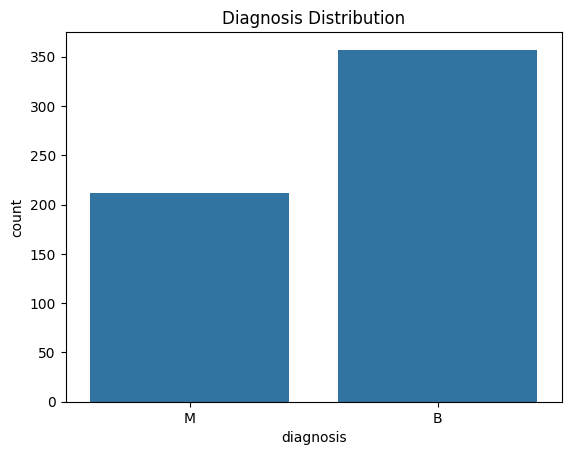

In [4]:
sns.countplot(x='diagnosis', data=cancer)
plt.title('Diagnosis Distribution')
plt.show()


# Correlation heatmap to observe feature relationships

In [6]:
numerical_features = cancer.select_dtypes(include=['number'])

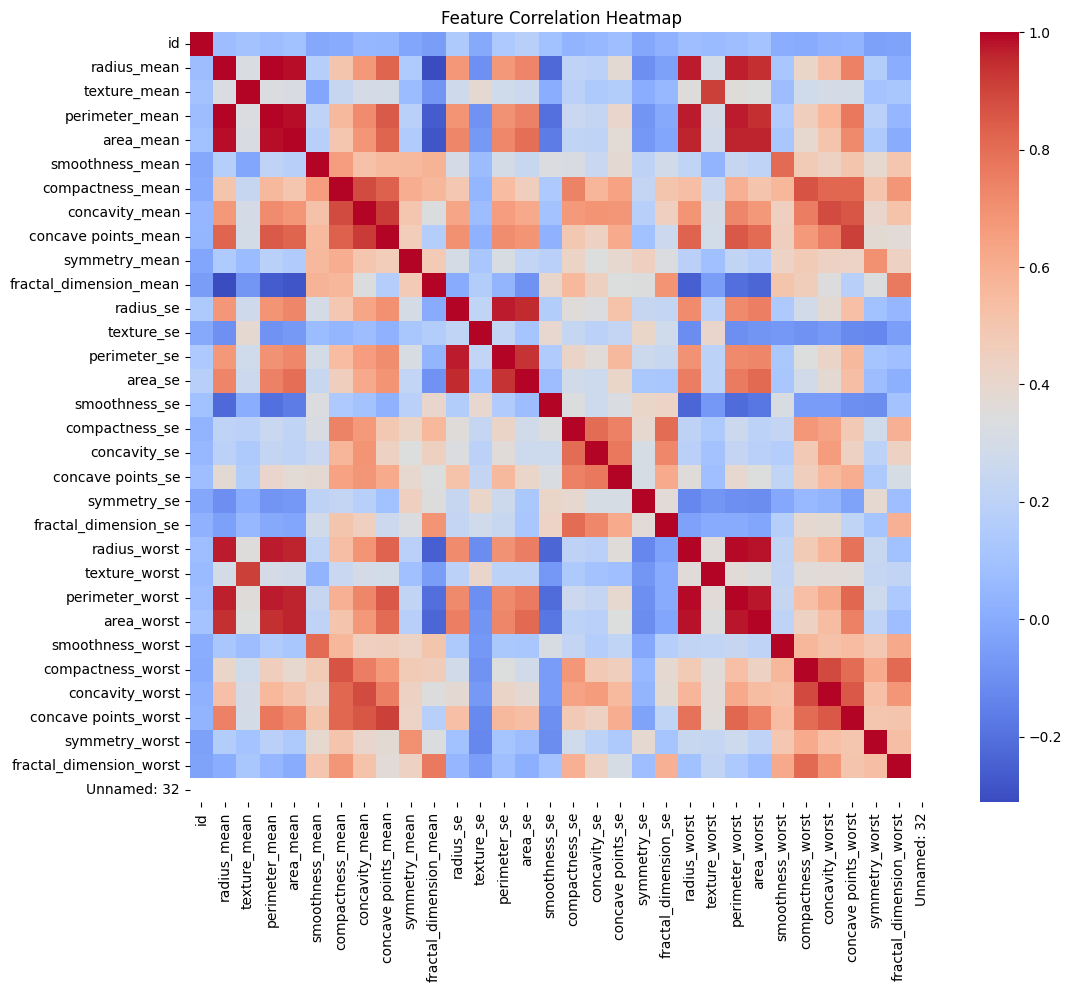

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(numerical_features.corr(), annot=False, cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()

# Step 5: Data Preprocessing
# Drop unnecessary columns and define target (y) and features (X)

In [8]:
X = cancer.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = cancer['diagnosis']

# Convert target variable (diagnosis) to binary encoding for compatibility with Logistic Regression

In [9]:
y = y.map({'M': 1, 'B': 0})

# Split data into train and test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2529)

# Step 6: Select Model

In [11]:
model = LogisticRegression(max_iter=5000)

# Step 7: Train or Fit Model

In [12]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

# Step 8: Predict Model

In [13]:
y_pred = model.predict(X_test)

# Step 9: Model Accuracy
# Confusion Matrix

In [14]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[97  5]
 [ 2 67]]


# Accuracy Score

In [15]:
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.9590643274853801


# Classification Report

In [16]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       102
           1       0.93      0.97      0.95        69

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# Visualize Confusion Matrix

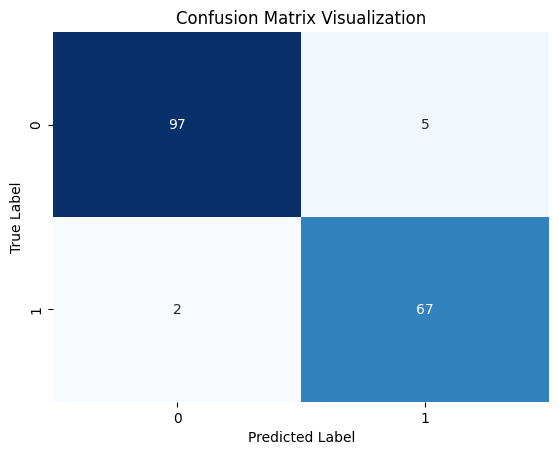

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Visualization")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()